# Transfer Learning

In [28]:
%tensorflow_version 2.x
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as k 
import os
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
!pip install split-folders
import split_folders

In [29]:
!wget http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
!tar -xf 101_ObjectCategories.tar.gz
split_folders.ratio('/content/101_ObjectCategories', output="/content/data", ratio=(.8, .1, .1))
# !wget http://www.vision.caltech.edu/Image_Datasets/Caltech256/256_ObjectCategories.tar
# !tar -xf 256_ObjectCategories.tar
# split_folders.ratio('/content/256_ObjectCategories', output="/content/data256", ratio=(.8, .1, .1))

--2019-11-12 18:48:15--  http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131740031 (126M) [application/x-tar]
Saving to: ‘101_ObjectCategories.tar.gz.1’

101_ObjectCategorie 100%[===================>] 125.64M  16.0MB/s    in 5.4s    

2019-11-12 18:48:21 (23.2 MB/s) - ‘101_ObjectCategories.tar.gz.1’ saved [131740031/131740031]



Copying files: 9145 files [00:01, 5115.99 files/s]


In [30]:
train_datagen = ImageDataGenerator(rescale=1./255,)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('/content/data/train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_generator=val_datagen.flow_from_directory('/content/data/val',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator=test_datagen.flow_from_directory('/content/data/test',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 7281 images belonging to 102 classes.
Found 865 images belonging to 102 classes.
Found 998 images belonging to 102 classes.


In [32]:
base_model=applications.MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

number_of_class = len(os.listdir("/content/data/train"))

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(number_of_class,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
history_t = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                    validation_data=val_generator,
                   epochs=10)

Epoch 1/10
227/227 [==============================] - 56s 248ms/step - loss: 1.7813 - accuracy: 0.5808 - val_loss: 3.8434 - val_accuracy: 0.3075
Epoch 2/10
227/227 [==============================] - 56s 245ms/step - loss: 0.9086 - accuracy: 0.7507 - val_loss: 1.4603 - val_accuracy: 0.6416
Epoch 3/10
227/227 [==============================] - 56s 247ms/step - loss: 0.6137 - accuracy: 0.8336 - val_loss: 1.9537 - val_accuracy: 0.5688
Epoch 4/10
227/227 [==============================] - 56s 248ms/step - loss: 0.4801 - accuracy: 0.8702 - val_loss: 1.0241 - val_accuracy: 0.7457
Epoch 5/10
227/227 [==============================] - 56s 245ms/step - loss: 0.3700 - accuracy: 0.8975 - val_loss: 1.0166 - val_accuracy: 0.7607
Epoch 6/10
227/227 [==============================] - 57s 253ms/step - loss: 0.3254 - accuracy: 0.9121 - val_loss: 1.8863 - val_accuracy: 0.6462
Epoch 7/10
227/227 [==============================] - 58s 255ms/step - loss: 0.3110 - accuracy: 0.9186 - val_loss: 1.4358 - val_ac

In [33]:
base_model=applications.MobileNet(weights=None,include_top=False, input_shape=(224, 224, 3))

number_of_class = len(os.listdir("/content/data/train"))

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(number_of_class,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model.summary()
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                     validation_data=val_generator,
                   epochs=10)

Epoch 1/10
227/227 [==============================] - 59s 262ms/step - loss: 3.7484 - accuracy: 0.2149 - val_loss: 5.3811 - val_accuracy: 0.0497
Epoch 2/10
227/227 [==============================] - 59s 258ms/step - loss: 3.2480 - accuracy: 0.2831 - val_loss: 4.8933 - val_accuracy: 0.0497
Epoch 3/10
227/227 [==============================] - 58s 257ms/step - loss: 2.9268 - accuracy: 0.3485 - val_loss: 3.4567 - val_accuracy: 0.2520
Epoch 4/10
227/227 [==============================] - 58s 257ms/step - loss: 2.6236 - accuracy: 0.3952 - val_loss: 3.0822 - val_accuracy: 0.3329
Epoch 5/10
227/227 [==============================] - 58s 258ms/step - loss: 2.3935 - accuracy: 0.4283 - val_loss: 3.0377 - val_accuracy: 0.3815
Epoch 6/10
227/227 [==============================] - 59s 258ms/step - loss: 2.1700 - accuracy: 0.4608 - val_loss: 2.6840 - val_accuracy: 0.4035
Epoch 7/10
227/227 [==============================] - 59s 261ms/step - loss: 1.9871 - accuracy: 0.5013 - val_loss: 2.5899 - val_ac

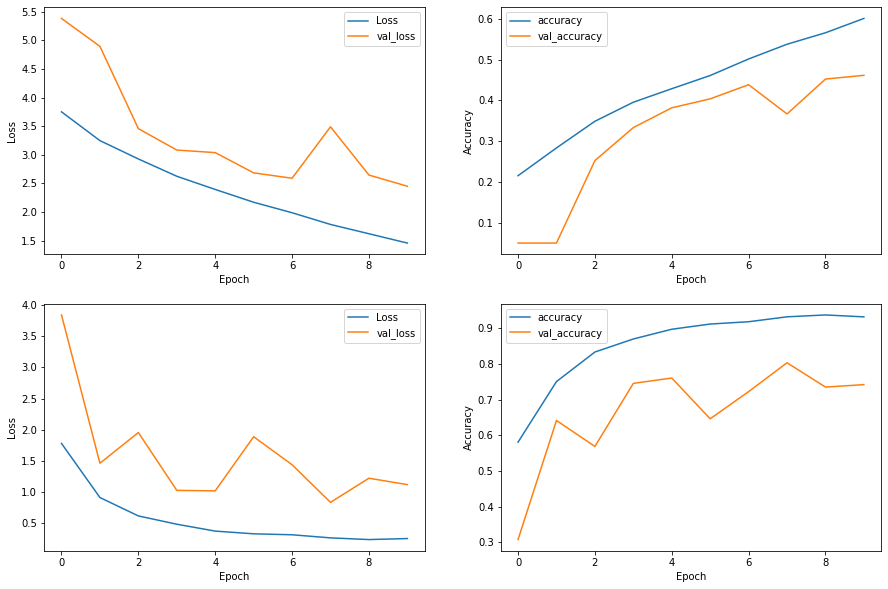

In [34]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
epochs_range = range(len(history.history['val_accuracy']))
axs[0,0].plot(epochs_range, history.history['loss'])
axs[0,0].plot(epochs_range, history.history['val_loss'])
axs[0,0].set_xlabel('Epoch')
axs[0,0].set_ylabel('Loss')
axs[0,0].legend(['Loss', 'val_loss'])
axs[0,1].plot(epochs_range, history.history['accuracy'])
axs[0,1].plot(epochs_range, history.history['val_accuracy'])
axs[0,1].set_xlabel('Epoch')
axs[0,1].set_ylabel('Accuracy')
axs[0,1].legend(['accuracy', 'val_accuracy'])

axs[1,0].plot(epochs_range, history_t.history['loss'])
axs[1,0].plot(epochs_range, history_t.history['val_loss'])
axs[1,0].set_xlabel('Epoch')
axs[1,0].set_ylabel('Loss')
axs[1,0].legend(['Loss', 'val_loss'])
axs[1,1].plot(epochs_range, history_t.history['accuracy'])
axs[1,1].plot(epochs_range, history_t.history['val_accuracy'])
axs[1,1].set_xlabel('Epoch')
axs[1,1].set_ylabel('Accuracy')
axs[1,1].legend(['accuracy', 'val_accuracy'])